# Análisis de componentes principales

In [1]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
df.columns=['sepal length','sepal width','petal length','petal width','target']

In [3]:
df.head(n=3)

,sepal length,sepal width,petal length,petal width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa


### 1. Implementación de PCA

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(n=3)

,principal component 1,principal component 2,target
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa


### 2. Visualización del plano factorial

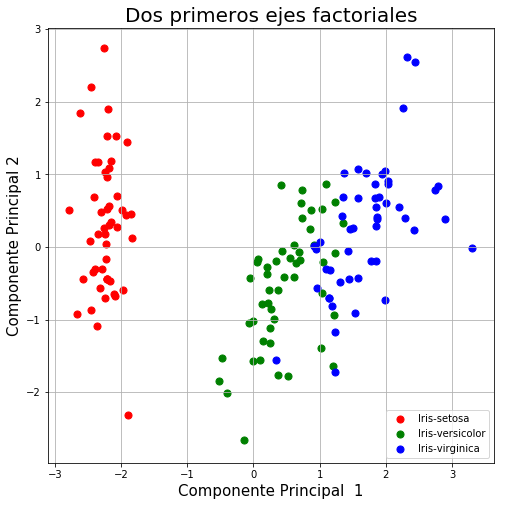

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal  1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('Dos primeros ejes factoriales', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 3. Varianza explicada

In [8]:
pca.explained_variance_ratio_

array([0.72620033, 0.23147407])

In [9]:
n_components=4
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(x)
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]
display(df.head())

,sepal length,sepal width,petal length,petal width,target,PC1,PC2,PC3,PC4
0,4.9,3.0,1.4,0.2,Iris-setosa,-2.107950,-0.644276,-0.228768,-0.103873
1,4.7,3.2,1.3,0.2,Iris-setosa,-2.387971,-0.305833,0.049672,-0.028274
2,4.6,3.1,1.5,0.2,Iris-setosa,-2.324879,-0.562923,0.097142,0.066136
3,5.0,3.6,1.4,0.2,Iris-setosa,-2.405086,0.687591,0.018819,0.037002
4,5.4,3.9,1.7,0.4,Iris-setosa,-2.083204,1.530252,0.027757,-0.004931


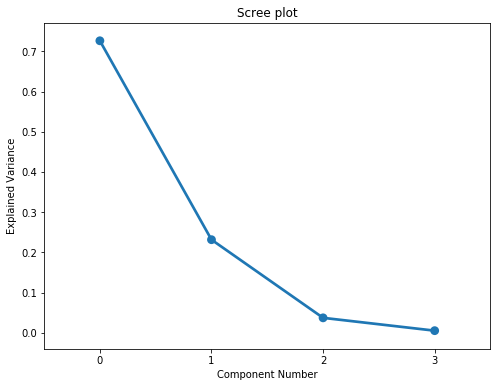

In [10]:
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()


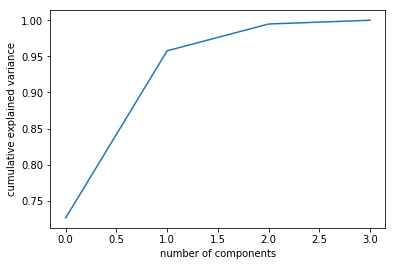

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### 4. Variables en el plano factorial

In [12]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.8) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

In [13]:
categories=['sepal length','sepal width','petal length','petal width']
categories

['sepal length', 'sepal width', 'petal length', 'petal width']

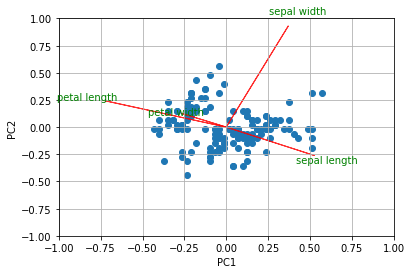

In [14]:
biplot(x,pca.components_,1,2,labels=categories)